In [1]:
# In this notebook we will get familiar with mirdata and PCA. 

# More specifically, we will work with the tinysol dataset,
# which consists of musical instrument notes. You can read 
# more about the tinysol dataset: https://zenodo.org/record/3685367#.YgnOty-B1qs

# install mirdata on the colab shell
!pip install # your code here

# now import mirdata
import # your code here

     |████████████████████████████████| 13.1 MB 3.0 MB/s 
     |████████████████████████████████| 51 kB 35 kB/s 
     |████████████████████████████████| 5.6 MB 39.8 MB/s 
     |████████████████████████████████| 51 kB 3.5 MB/s 
     |████████████████████████████████| 87 kB 2.7 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=02de00af500ee2502895aba3d8c5d8917f8c3618d18c18e9af000cff0fe978d2
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64922 sha256=3fff22248775788311b318fca8981a6bf6f6f2f19e2e47ce10c23898fa52381f
  Stored in directory: /root/.cache/pip/wheels/c9/aa/16/ce72bc4caa58dfab819e3f46b3542f2bf90a83009f4ea07a48
  Created wheel for mir-eval: filename=mir_eval-0.6-py3-none-any.whl size=96515 sha256=e89bedb75afb2add7e70e6a3388badd1d17198307d13cd6e9a7a88820111b0b1
  Stored in directory: /root/.cache/pip/whe

In [2]:
# now we can initialize the tinysol dataset and download it
tinysol = mirdata.initialize(# your code here
tinysol # your code here

INFO: Downloading ['audio', 'annotations'] to /root/mir_datasets/tinysol
INFO: [audio] downloading TinySOL.tar.gz
979MB [06:16, 2.73MB/s]                           
INFO: [annotations] downloading TinySOL_metadata.csv
312kB [00:01, 167kB/s]                           


In [3]:
# Many datasets in mirdata have a list with the name of all the 
# "tracks" (i.e. wav files). This list can be accessed with the
# track_ids attribute

# get the list with all tracks
all_tracks = # your code here

# in the tinysol dataset you can use the track class to access 
# each track's "variables", including the instrument that it was played with 

# Iterate over all track ids and save the unique instrument abbreviations
unique_inst_abbrs = []
for t in all_tracks: 
  # your code here 

print("The unique instrument abbreviations are:")
print(unique_inst_abbrs)

The unique instrument abbreviations are:
['BTb', 'Hn', 'Tbn', 'TpC', 'Acc', 'Vc', 'Cb', 'Va', 'Vn', 'ASax', 'Bn', 'ClBb', 'Fl', 'Ob']


In [ ]:
# now we will get a list with all the tracks for 
# two instruments in unique_inst_abbrs

# define the instruments you want to work with. 
# Use a string with the instrument abbreviation
inst_1 = 'Vn'
inst_2 = 'BTb'

# now iterate over these two instrument abbreviations
# and save ALL the instrument tracks in a list of strings
inst_tracks = []
for inst in [inst_1, inst_2]:
  inst_tracks.extend(# your code here

# now count how many tracks we have in total and 
# how many tracks belong for each instrument 
N = len(inst_tracks)
Ninst_1 = # your code here
Ninst_2 = # your code here

print("The total number of tracks is {}".format(N))
print("The number of trakcks for inst_1 is {}".format(Ninst_1))
print("The number of trakcks for inst_2 is {}".format(Ninst_2))

# now import numpy and librosa
import numpy as np
import librosa

# now load all the audio files and append them 
# to a list of tracks called X
# the files can be very big, so working with the 
# raw audio can be very inefficient
# consider resampling to 8kHz, using only half 
# a second of audio, obtaining the fft magnitude (to discard
# the negative frequencies), and converting to dB. 
# When done, cast X to be numpy array
X = []
fs8k = 8000
for track in inst_tracks:
  x,fs = tinysol.track(track).audio
  # x = librosa.resample(x,fs,fs8k)
  X.append(librosa.amplitude_to_db(np.abs(np.fft.fft# your code here
X = np.array(X)

print("The shape of X is")
print(X.shape)
# Q: what's the meaning of the numbers in the shape of X?
# A:

# depending on the code you write, this can take a while to run

# The data is ready!

The total number of tracks is 392
The number of trakcks for inst_1 is 284
The number of trakcks for inst_2 is 108
The shape of X is
(392, 2049)


The percent of variance explained by each eigenvalue-eigenvector pair is: 
[53.7  10.62  2.32 ... -0.   -0.   -0.  ]


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


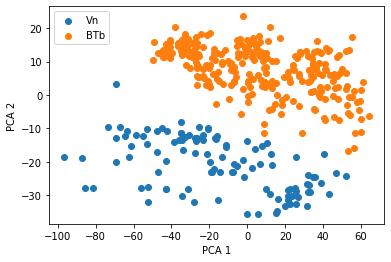

In [ ]:
##################
###    PCA     ###
##################

# Now we have a matrix X with datapoints and "features"
# We can reduce the dimensionality of this data using PCA

# 1. calculate mu, which has the mean of each feature 
# and subtract from X
# Q: What type of object is mu? why do we need it? How do we use it?
# A: 
mu = # your code here
Xmu = # your code here

# 2. now we calculate sigma, which is the standard deviation of each feature
# and divide Xmu by it
# Q: What type of object is sigma? why do we need it? How do we use it?
# A: 
s = # your code here
Xmus = # your code here

# 3. now calculate the covariance matrix
# Q: what are the dimensions of this matrix? why does it have that shape?
# Q: what does this matrix tell us?
# A: 
C = # your code here


# 4. you can find the Eigenvalues and Eigenvectors of C
# Eigenvalues can have a complex type (Q: why? A: ). 
# Cast them to be real (Q: why can we do this here? A: )
E, V = np.linalg.eig(C)
E = np.real(E)

# 5. inspect how much of the data variance each 
# eigenvalue-eigenvector pair explains. To do this
# you have to convert the eigenvalues to probabilities
# and multiply by 100 to convert to "percent of variance explained"
# round to two digits to make this easier to read
perc_variance = # your code here to get a list with the percentage variance explained by each eigenvalue-eigenvector pair

print("The percent of variance explained by each eigenvalue-eigenvector pair is: ")
print(perc_variance)

# Now we can reduce the dimensionality by defining a matrix W whose columns
# are the two eigenvectors that correspond to the largest eigenvalues
W = V[:,:2]

# and proyecting the standardized data onto these eigenvectors
X_reduced = np.dot( # your code here

# X_reduced has your data, but with dimensionality reduced to the two components
# that explain most of the variance in the data

# Let's plot the results (you should not have to do anything here)
import matplotlib.pyplot as plt

plt.scatter(X_reduced[Ninst_1:,0],X_reduced[Ninst_1:,1], label=inst_1)
plt.scatter(X_reduced[:Ninst_1,0],X_reduced[:Ninst_1,1], label=inst_2)
plt.legend()

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

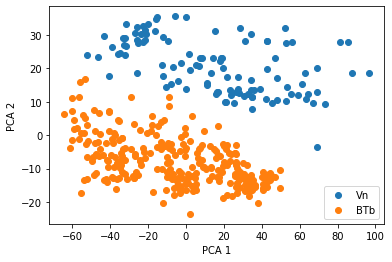

In [ ]:
# Now learn how to do the same with the PCA object in sklearn
# your do not have to do anything here if you did everything correctly in the previous cell


from sklearn.decomposition import PCA

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components=2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xmus)

plt.scatter(X_PCA[Ninst_1:,0],X_PCA[Ninst_1:,1], label=inst_1)
plt.scatter(X_PCA[:Ninst_1,0],X_PCA[:Ninst_1,1], label=inst_2)
plt.legend()

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Q: Do the plots look the same? Why?
# A:

In [ ]:
# Now your homework truly starts:

# Here we have used the each signal's magnitude spectrum as the feature space 
# that we reduce using PCA.
# You know more features than that! (remember class No.2?)

# Find the set of features that maximally separate the datapoints
# belonging to two instruments in the tinysol dataset. Be creative! Which
# features best separate the two instruments you have selected?

# To compute PCA, you may use sklearn PCA or your "by hand" implementation. 

# Then do the same with the datapoints of three different instruments of your choice

# Add cells below to create the best plots you can with the datapoints of two and three 
# musical instruments as maximally separated from each other as possible. 

# Q: Does your method work better for some instrument combinations than others? why?
# A: